# Selecionar a melhor estratégia para classificação com KNN

Neste notebook exploraremos os métodos para conseguir a melhor configuração do valor K do algoritmo KNN (_k-nearest neighbor_) e a melhor estratégia para eliminação de _missing values_.

Para tal, variamos os valores de K de forma crescente utilizando cada uma das três bases de dados em que foi aplicado uma estratégia para substituição dos _missing values_.

A métrica utilizada para a avaliação da melhor estratégia é a acurácia.

### importar as bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

### Carregar as bases de dados

In [2]:
# Dados de treinameto
# Missing values substituídos pela média, moda e mediana, respectiviamente
training_mean = pd.read_csv("data/training_mean.csv").set_index('sessionNo')
training_mode = pd.read_csv("data/training_mode.csv").set_index('sessionNo')
training_median = pd.read_csv("data/training_median.csv").set_index('sessionNo')

# Dados de teste
# Missing values substituídos pela média, moda e mediana, respectiviamente
testing_mean = pd.read_csv("data/testing_mean.csv").set_index('sessionNo')
testing_mode = pd.read_csv("data/testing_mode.csv").set_index('sessionNo')
testing_median = pd.read_csv("data/testing_median.csv").set_index('sessionNo')

## Funções auxiliares

### Separar um dataframe em um vetor de características e  um vetor de classe

In [3]:
def splitData(df):
    x = df.iloc[:, :-1]
    y = df['order']
    return x, y

### Calcular um array de acurácias para cada valor de k

Essa função testa valores ímpares de K em um dado conjunto de testes retornando um vetor de acurácias, o menor valor e o parâmetro K que gerou esse valor.

In [4]:
def makeAccsKnn(df_train, df_test, test_values):
    x_train, y_train = splitData(df_train)
    x_test, y_test = splitData(df_test)
    accs = []
    best_k = 1
    maxi = 0.
    for k in test_values:
        knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
        knn.fit(x_train, y_train)
        acc = knn.score(x_test, y_test)
        if(acc > maxi):
            maxi = acc
            best_k = k
        accs.append(acc)
    return accs, maxi, best_k

### Apresenta um gráfico com os valores de K e a acurácia obitida do modelo

Importante ressaltar que os valores testados devem ser ímpares

In [5]:
def plotAcc(df_train, df_test, test_values):
    accs, maxi, best_k = makeAccsKnn(df_train, df_test, test_values)
    plt.plot(test_values, accs, marker='o')
    plt.xlabel('K')
    plt.ylabel('Acurácia')
    plt.title('Acurácias por valores de K')
    plt.show()
    print('Maior acurácia: '+ str(maxi))
    print('Melhor k: '+ str(best_k))

## Execução dos experimentos

### Missing values substituídos pela média

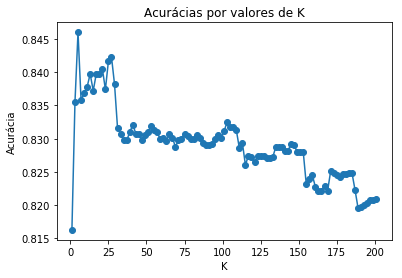

Maior acurácia: 0.846018391704
Melhor k: 5


In [6]:
# Testar os valores ímpares entre 0 e 203
plotAcc(training_mean, testing_mean, list(range(1, 203, 2)))

### Missing values substituídos pela moda

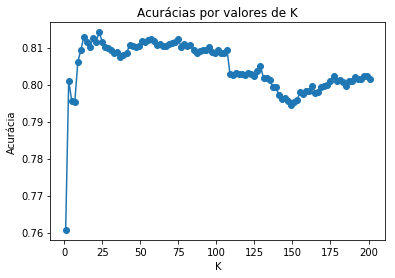

Maior acurácia: 0.814126394052
Melhor k: 23


In [7]:
# Testar os valores ímpares entre 0 e 203
plotAcc(training_mode, testing_mode, list(range(1, 203, 2)))

### Missing values substituídos pela mediana

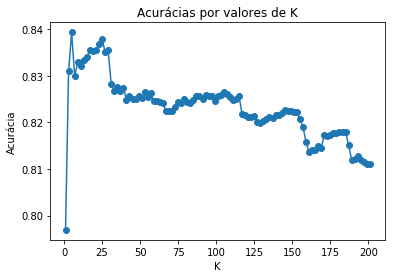

Maior acurácia: 0.839366073176
Melhor k: 5


In [8]:
# Testar os valores ímpares entre 0 e 203
plotAcc(training_median, testing_median, list(range(1, 203, 2)))

## Conclusão

Baseado nos valores máximos de acurácia, decidimos que a estrátégia de substituir os _missing values_ pela média e K = 5 será utilizada na etapa de seleção de variáveis.